# 实验五  层次聚类

## 实验要求
### 数据集 <br/>
生成 2000 个样例，每个样例的前 3 列表示特征，第 4 列表示标签
<br/>
### 初级要求 <br/>
绘制聚类前后样本分布情况

(1) 实现 single-linkage 层次聚类算法；

(2) 实现 complete-linkage 层次聚类算法。
<br/>
### 中级要求 <br/>
实现 average-linkage 层次聚类算法，绘制样本分布图。
<br/>
### 高级要求<br/>
对⽐上述三种算法，给出结论。

## 一. 初级要求
（1） 实现 single-linkage 层次聚类算法

（2） 实现 complete-linkage 层次聚类算法

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets._samples_generator import make_blobs
%matplotlib inline  
MAX_NUM = 1e3

### 实现single-linkage和complete-linkage算法

In [2]:
def singleLinkage(X,_):
    return np.min(X, axis=0)
def completeLinkage(X,_):
    return np.max(X, axis=0)

### 聚类过程

In [12]:
class AgglomerativeClustering:
    def __init__(self):
        # 记录每次的合并步骤
        self.steps = []

    def fit(self, datas, method):
        # 计算数据集样本个数
        self.dataCnt = datas.shape[0]
        
        # 预处理各点之间的距离矩阵
        allDist = np.zeros((self.dataCnt, self.dataCnt))
        for i in range(self.dataCnt):
            for j in range(i):
                allDist[i][j] = allDist[j][i] = np.sum((datas[i] - datas[j]) ** 2)
        
        # 初始化聚类集合和聚类个数
        setList, count = [[i] for i in range(self.dataCnt)], self.dataCnt

        # 初始化聚类间距离矩阵
        dist = np.zeros((self.dataCnt, self.dataCnt)) + MAX_NUM
        for i in range(count):
            for j in range(i + 1, count):
                dist[i][j] = dist[j][i] = allDist[i][j]

        while count != 1:
            # 找到聚类间距离矩阵中最小的两个聚类
            res = np.argmin(dist)
            dest, src = int(res / count), res % count
            
            # 记录合并步骤
            self.steps.append((setList[dest][0], setList[src][0]))
            
            # 更新聚类间距离矩阵
            modify = method(dist[[dest, src]], (len(setList[dest]), len(setList[src])))
            dist[dest] = modify
            dist[:, dest] = modify
            dist = np.delete(dist, src, axis=0)
            dist = np.delete(dist, src, axis=1)
            dist[dest][dest] = MAX_NUM
            
            # 更新聚类集合
            setList[dest] = setList[dest] + setList[src]
            del setList[src]
            count -= 1

    def label(self, k):
        # 初始化根节点列表
        root = list(range(self.dataCnt))

        def find_root(n):
            # 递归查找根节点
            if root[root[n]] == root[n]:
                return root[n]
            root[n] = find_root(root[n])
            return root[n]

        for i in range(self.dataCnt - k):
            # 根据合并步骤记录，构建非连通图
            src, dest = self.steps[i]
            root[find_root(dest)] = find_root(src)

        cluster, clusterNum = [0 for i in range(self.dataCnt)], 0
        for i in range(self.dataCnt):
            # 将根节点标注为新的聚类
            if i == root[i]:
                clusterNum += 1
                cluster[i] = clusterNum

        for i in range(self.dataCnt):
            # 将非根节点标注为对应根节点的聚类
            if i != root[i]:
                cluster[i] = cluster[find_root(i)]

        return cluster


## 中级要求
实现 average-linkage 层次聚类算法，绘制样本分布图。

In [ ]:
def averageLinkage(X, num):
    return np.average(X, axis=0, weights = num)

### 生成数据

In [6]:
def create_data(centers,num=100,std=0.7):
    X, labels_true = make_blobs(n_samples=num, centers=centers, cluster_std=std)
    return  X,labels_true

### 绘制三维图像

In [7]:
def plot_3D(*data):
    X,labels_true,labels_predict,name =data
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    colors='rgbyckm' # 每个簇的样本标记不同的颜色
    for i in range(len(labels_true)):
        predict=labels_predict[i]
        ax.scatter(X[i,0],X[i,1],X[i,2], color=colors[predict%len(colors)],s=np.pi)
    plt.title(name)
    plt.show()

### 绘制三种算法对应的图像

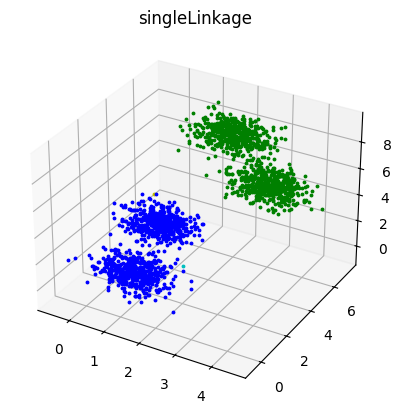

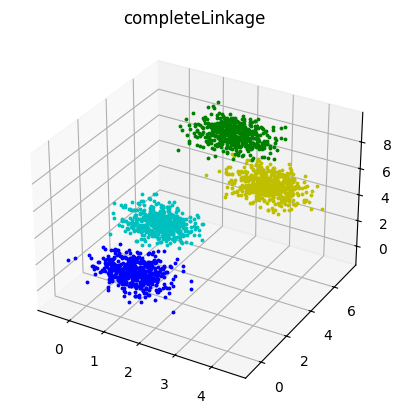

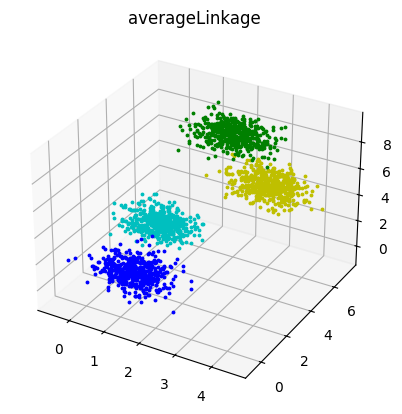

In [13]:
centers = [[1, 1, 1], [1, 3, 3], [3, 6, 5], [2, 6, 8]]
X, labels_true = create_data(centers, 2000, 0.5)
np.savetxt('data.dat', X)
np.savetxt('label.dat', labels_true)

title = ['singleLinkage', 'completeLinkage', 'averageLinkage']
METHOD_APPLY = [singleLinkage, completeLinkage, averageLinkage]
k = 4
pre_label = []  # 保存预测类别

for i, method in enumerate(METHOD_APPLY):
    model = AgglomerativeClustering()
    model.fit(X, method)
    pre_label.append(model.label(k))
    plot_3D(X, labels_true, model.label(k), title[i])

## 高级要求
对比上述三种算法，给出结论。

### SingleLinkage（单链接）：

相似性度量： 使用两个聚类中最相似的成员之间的距离作为聚类之间的距离。

合并规则： 将两个具有最小距离的数据点所在的聚类进行合并。

### AverageLinkage（平均链接）：

相似性度量： 使用两个聚类中所有成员之间的平均距离作为聚类之间的距离。

合并规则： 将两个具有最小平均距离的聚类进行合并。

### CompleteLinkage（完全链接）：

相似性度量： 使用两个聚类中最不相似的成员之间的距离作为聚类之间的距离。

合并规则： 将两个具有最小距离的数据点所在的聚类进行合并。

### 三种算法的区别

这三种链接方式的主要区别在于如何度量聚类之间的距离和如何选择合并的聚类。SingleLinkage倾向于生成较长的、不规则的聚类，而CompleteLinkage倾向于生成紧凑的、球形的聚类。AverageLinkage通常介于两者之间。对于聚类准确性上来说更稳定。